# DETECCIÓN DE LENGUAJE EN TEXTO USANDO EL MODULO NLTK DE PHYTON 

Este notebook tiene cómo objetivo, utilizar NTLK para realizar la detección del idioma en los textos contenidos en un archivo csv.

## Requisitos
Para ejecutar correctamente esta demo, se requiere:
- Python 3.0 con Jupyter

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk; 
#nltk.download('popular')
nltk.download('perluniprops')

[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\lope25642\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize.nist import NISTTokenizer
nist = NISTTokenizer()
##obtener lista de lenguajes soportados por la version de ntlk instalada
languages = stopwords.fileids()

print(languages)


['Chinese', 'Estonian', 'Hindi', 'Japanese', 'Korean', 'Latin', 'Persian', 'Pushto', 'Tamil', 'Thai', 'Urdu', 'arabic', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'tajik', 'turkish']


In [11]:
#funcion para detectar el idioma usando ntlk
import nltk
from nltk import SyllableTokenizer
from nltk import util
import re
#import warnings
#warnings.filterwarnings("error")

def get_language_nltk(text_to_detect, langu):
    tk = SyllableTokenizer()
   
    tokens = split(text_to_detect)
    if nltk.tokenize.util.is_cjk(tokens[0]) or is_ur_t(tokens[0]): 
        #print(langu)
        tokens = tk.tokenize(text_to_detect)
    else:
        tokens = nltk.tokenize.word_tokenize(text_to_detect)   
    
    
    if len(tokens) < 3:
             tokens = split(text_to_detect)
            
    tokens = [t.strip().lower() for t in tokens] 
   
    lang_count = {}

    for lang in languages:
         stop_words = str(nltk.corpus.stopwords.words(lang))
         lang_count[lang] = 0 # Inicializa a 0 el contador para cada idioma
        
         for word in tokens:
             if word in stop_words: # Si la palabra se encuentra entre las stopwords, incrementa el contador
                 lang_count[lang] += 1                 
                    
   # Obtiene el idioma con el número mayor de coincidencias
    return max(lang_count, key=lang_count.get)

def split(word):
    return [char for char in word]

def is_ur_t(character):
       return any(
        [
            start <= ord(character) <= end
            for start, end in [
                (1536, 1791),
                (1872, 1919),
                (3584, 3711),
                (64336, 65023),
                (65136, 65279),
            ]
        ]
    )

In [12]:
import csv
from csv import reader
i = 1

##Archivo para almacenar resultados
outputFile = open('D:\TFM\dataset_multilanguage_result_ntlk.csv', 'w', encoding="utf8",newline='')
writer = csv.writer(outputFile)
writer.writerow(['Text', 'Language', 'LanguageDetected'])

# leer dataset
with open('D:\TFM\dataset_multilanguage.csv', 'r', encoding="utf8") as read_obj:
    from datetime import datetime
    print(datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
    csv_dict_reader = csv.DictReader(read_obj)
    for row in csv_dict_reader:
        if i > 5000:  ## usar los mismo 5000 textos usados con azure cognitive services
            break
        try: 
            #print('Detectando texto ', i, '....')
            detect =  get_language_nltk(row['Text'],row['language'])
            writer.writerow([row['Text'], row['language'],detect])            
        except Exception as err:
            ## si falla algo abortar
            print("Encountered exception. {}".format(err))
            break
        i = i +1
outputFile.close()
print(datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
print('Finalizó proceso')


21/05/2022 12:52:37


C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ถ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'น'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'เ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'จ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'オ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ピ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '開'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '催'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '집'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '단'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '통'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '치'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '藤'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '教'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '師'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '歳'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ć'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ڈ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ˈ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ː'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ٔ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '월'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '참'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '조'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ګ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '노'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '트'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '라'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ฝ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ฑ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '換'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '尾'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '°'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '′'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'π'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '×'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '罗'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '伯'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '菲'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '茨'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '태'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '무'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '왕'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '매'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ڑ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ฬ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '움'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '돈'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ズ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ョ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '航'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '宇'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ฺ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '諸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '素'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '且'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '柔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '远'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '驿'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '琉'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ā'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ū'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '虑'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '排'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '衡'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '湖'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '省'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '偏'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '랑'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '료'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '렉'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '늑'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '規'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '典'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ォ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '＝'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '士'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '課'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '埼'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '玉'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '刑'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '犯'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '罪'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '訳'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ä'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '善'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '覧'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ぼ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '貸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '切'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '観'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '昼'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '웹'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '페'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '맷'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '콜'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '걸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '협'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '백'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '령'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ٻ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '乞'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '＋'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '砥'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '浪'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '阪'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '波'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '伸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '九'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '春'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '祥'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '址'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '端'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '岸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '脈'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '藪'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '旬'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '帰'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '萩'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '津'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '径'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '弾'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '薬'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '拳'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ó'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ą'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '๋'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '途'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '扶'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '村'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '労'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '働'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '棄'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '圧'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '仰'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '拷'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '砂'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '賃'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '専'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '松'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '潭'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '妝'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '娛'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '泰'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '죄'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '专'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '卓'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '络'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '貨'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '裝'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '缷'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '僚'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ε'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'λ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ά'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'δ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '샘'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '칸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '낙'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '렬'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '丝'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '鄭'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '魁'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '舊'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ח'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ט'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'י'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'פ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '손'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '솔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '끊'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '맹'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '唐'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '旦'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '宋'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '興'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '芳'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '誌'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '荘'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '석'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '邓'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '跟'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '矶'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '坞'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '랙'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '핸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '둔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '純'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '挥'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '辖'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '炮'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '廖'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '埋'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '檢'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '詢'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '齊'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '纏'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '奠'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '堵'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '薇'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '狙'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '借'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '昨'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '履'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '冀'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '边'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '础'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '套'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '俯'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '瞰'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '闇'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '劍'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '绵'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '戴'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '忍'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '砍'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '‏'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '彭'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '諾'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '侃'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '널'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '쥔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '汚'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '塩'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '杰'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '牺'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '摧'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '毁'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '宅'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '蕭'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '巷'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '幫'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '젱'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '漲'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '錯'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '늦'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '幻'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '棋'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '掷'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '骰'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ग'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'र'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'म'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'स'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'п'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'д'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'в'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ы'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '陵'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ヲ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '踊'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '緒'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '뭇'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ז'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'א'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ן'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '쓸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '쳤'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '푸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '톨'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '订'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '绪'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '豐'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '礦'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '蓬'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '畢'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '鐸'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '淮'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '鷲'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '끈'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ş'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'č'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '鴿'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '辟'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '恒'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '劫'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '헬'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '푼'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '빚'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '떴'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'σ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'τ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'η'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'з'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '숲'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '낌'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '꼴'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '斉'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '葵'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '苗'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '紹'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: 'ڤ'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '쨌'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '힐'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '紧'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '脏'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '嬢'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '叔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '酔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '脳'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '숱'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '릴'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '隱'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '諮'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '舷'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '駆'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '寝'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '猜'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '零'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '뿔'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '濮'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '罽'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '닫'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '탱'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '窟'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '庇'
  " assigning as vowel: '{}'".format(c))
C:\Users\lope25642\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assig

21/05/2022 12:55:29
Finalizó proceso


In [13]:
import pandas as pd
import numpy as np
results  = pd.read_csv('D:\TFM\dataset_multilanguage_result_ntlk.csv')
results.loc[results["LanguageDetected"] == "portuguese", "LanguageDetected"] = "Portugese"


results['Compare'] = np.select([results ['Language'].str.lower() != results ['LanguageDetected'].str.lower()], ['Different'], 'Same ')
results = results.drop(['Text'], axis=1)
results = results[results.Compare == 'Different']
print(results)
results.head(15)

       Language LanguageDetected    Compare
1       Swedish          english  Different
18    Portugese          english  Different
42        Latin          english  Different
66         Thai          english  Different
68         Urdu           arabic  Different
...         ...              ...        ...
4905      Latin         Estonian  Different
4922   Romanian          english  Different
4970      Latin       indonesian  Different
4997   Estonian       indonesian  Different
4999      Latin          italian  Different

[378 rows x 3 columns]


,Language,LanguageDetected,Compare
1,Swedish,english,Different
18,Portugese,english,Different
42,Latin,english,Different
66,Thai,english,Different
68,Urdu,arabic,Different
83,Korean,Latin,Different
85,Indonesian,Latin,Different
88,Latin,indonesian,Different
101,Russian,kazakh,Different
114,Romanian,turkish,Different


In [14]:
count = results.groupby(['Language']).size().reset_index(name="count")
count = count.sort_values('count',ascending=True)

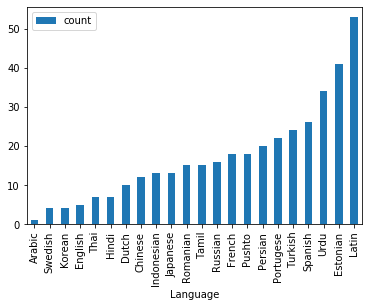

In [15]:
import matplotlib.pyplot as plt
ax = count.plot.bar(x='Language', y='count', rot=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

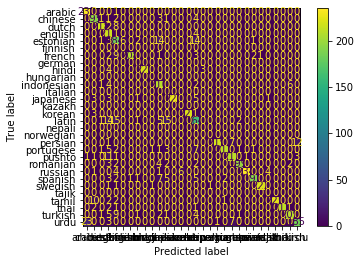

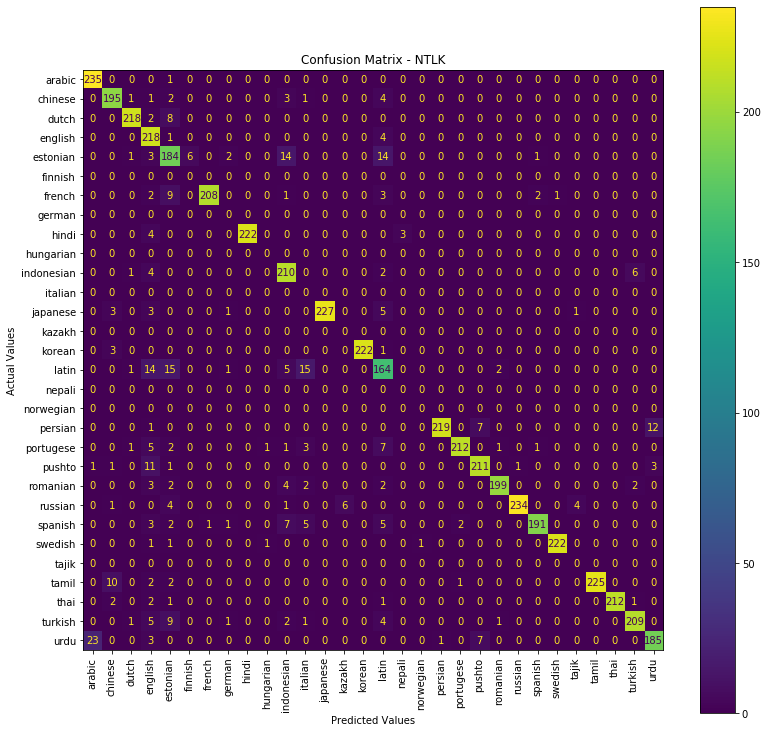

In [21]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

results2  = pd.read_csv('D:\TFM\dataset_multilanguage_result_ntlk.csv')
results2.loc[results2["LanguageDetected"] == "portuguese", "LanguageDetected"] = "portugese"
results2['Language']= results2['Language'].str.lower()
results2['LanguageDetected']= results2['LanguageDetected'].str.lower()
cmd = ConfusionMatrixDisplay.from_predictions(results2['Language'], results2['LanguageDetected'])
fig, ax = plt.subplots(figsize=(13,13))
cmd.plot(ax=ax)
cmd.ax_.set(
                title='Confusion Matrix - NTLK', 
                xlabel='Predicted Values', 
                ylabel='Actual Values')

plt.xticks(rotation=90)



In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(results2['Language'], results2['LanguageDetected']))
print(classification_report(results2['Language'], results2['LanguageDetected']))

0.9244
              precision    recall  f1-score   support

      arabic       0.91      1.00      0.95       236
     chinese       0.91      0.94      0.92       207
       dutch       0.97      0.96      0.96       228
     english       0.76      0.98      0.85       223
    estonian       0.75      0.82      0.78       225
     finnish       0.00      0.00      0.00         0
      french       1.00      0.92      0.96       226
      german       0.00      0.00      0.00         0
       hindi       1.00      0.97      0.98       229
   hungarian       0.00      0.00      0.00         0
  indonesian       0.85      0.94      0.89       223
     italian       0.00      0.00      0.00         0
    japanese       1.00      0.95      0.97       240
      kazakh       0.00      0.00      0.00         0
      korean       1.00      0.98      0.99       226
       latin       0.76      0.76      0.76       217
      nepali       0.00      0.00      0.00         0
   norwegian       0

C:\Users\lope25642\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lope25642\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lope25642\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
